In [ ]:
import numpy as np

In [ ]:
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [ ]:
train = pd.read_csv("/content/train__dataset.csv")

In [ ]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [ ]:
train.shape

(18137, 18)

In [ ]:
test = pd.read_csv("/content/test___dataset.csv")

In [ ]:
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,2018,3,28,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,2018,12,9,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,2018,2,27,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,2018,10,23,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,2018,8,31,1,0,0,0,123.3,0


In [ ]:
test.shape

(18138, 17)

In [ ]:
train.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [ ]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [ ]:
plt.figure(figsize = (5,5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [ ]:
a = train['booking_status'].value_counts()

Text(0.5, 1.0, 'Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ')

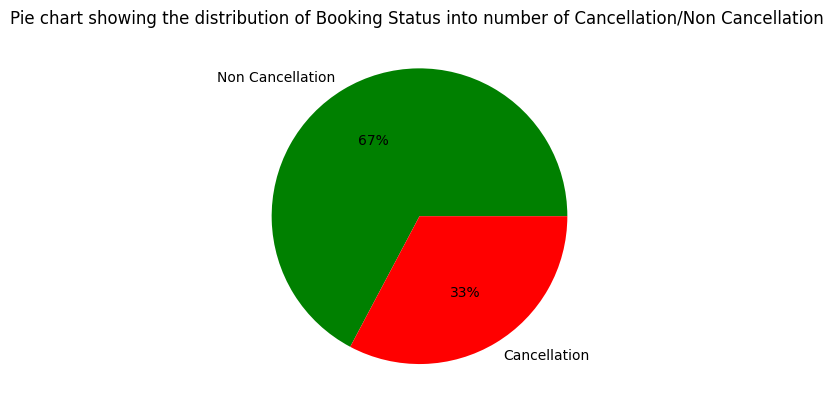

In [ ]:
plt.pie(x = a, data = train, labels= ['Non Cancellation', 'Cancellation'], autopct='%.0f%%', colors = 'gr')
plt.title("Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'type_of_meal_plan'}>,
        <Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'room_type_reserved'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>,
        <Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'market_segment_type'}>],
       [<Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'avg_price_per_room'}>],
       [<Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_st

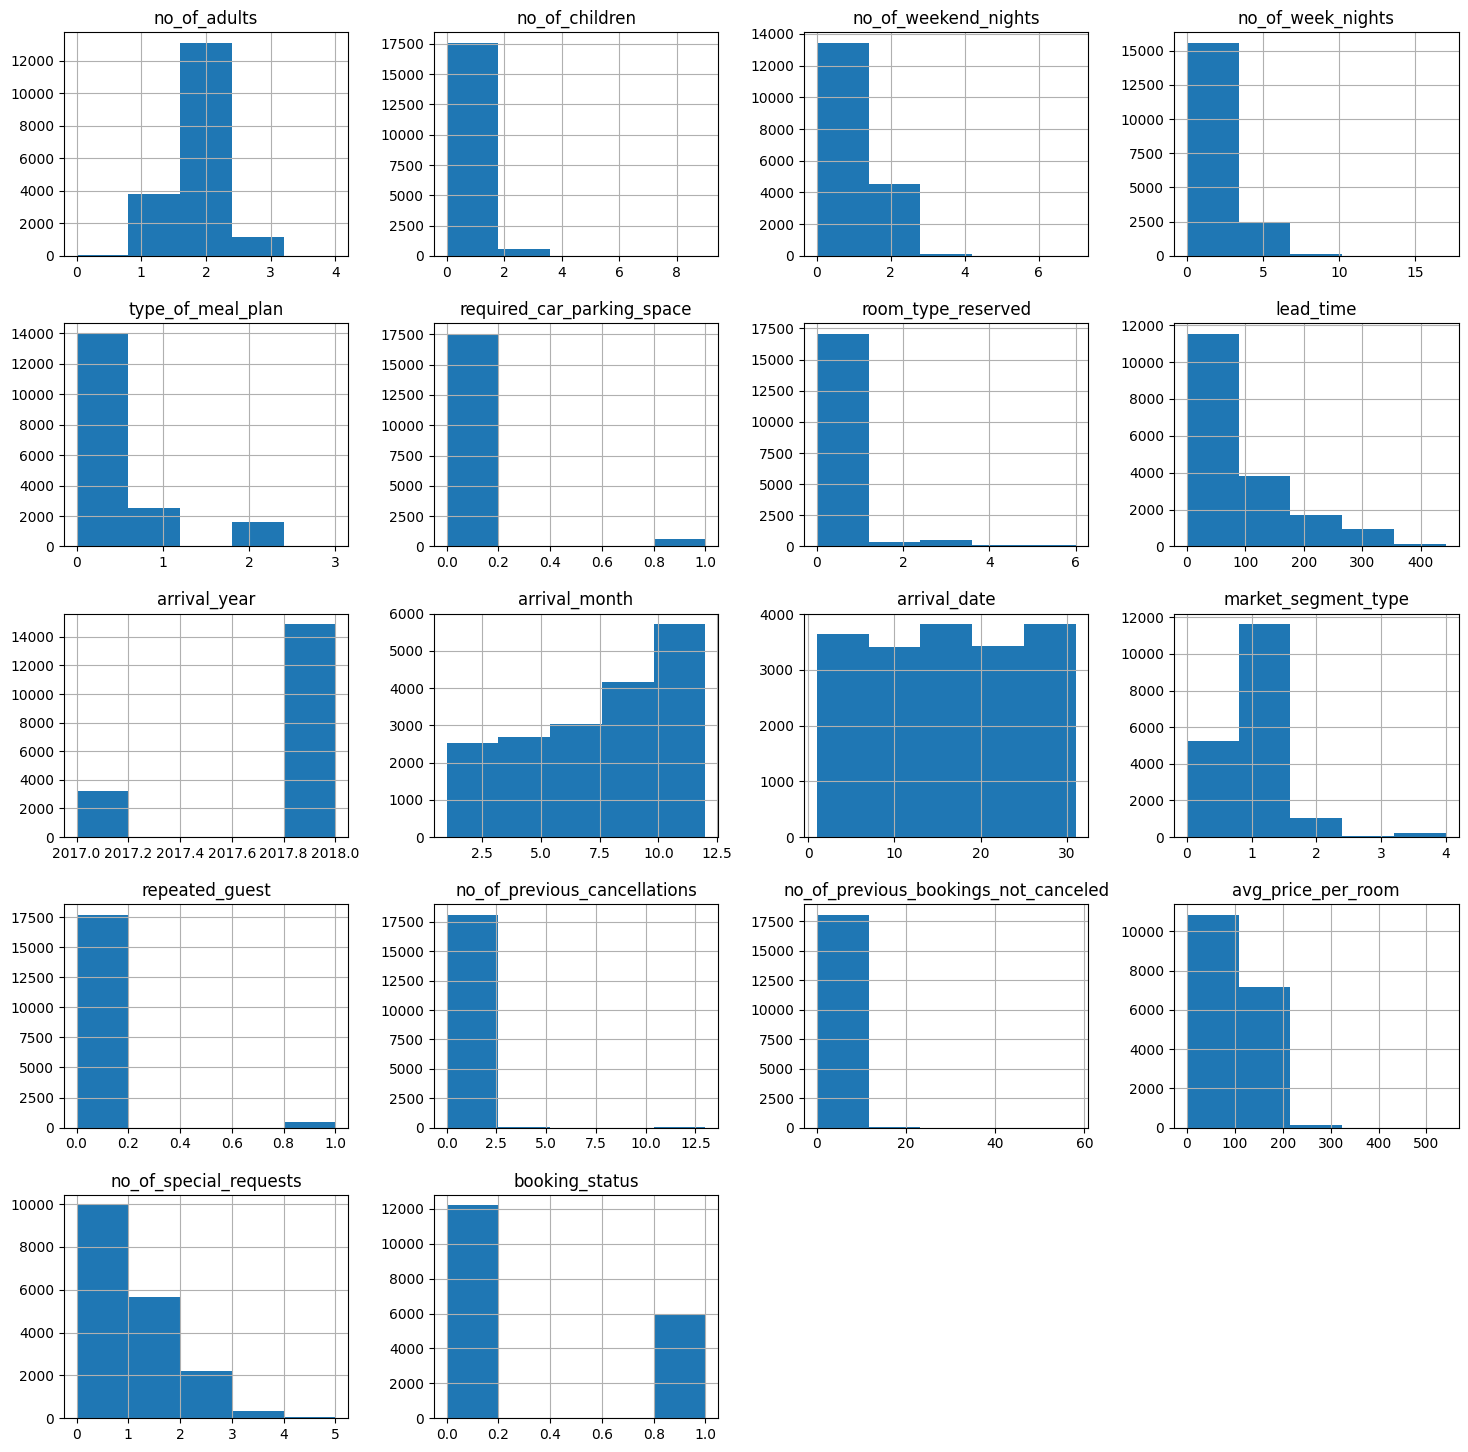

In [ ]:
train.hist(bins=5,figsize=(18,18))

In [ ]:
def countplot_of_2(x, hue,title=None, figsize=(6,5)):
  plt.figure(figsize=figsize)
  sns.countplot(data=train [[x, hue]],x=x, hue=hue)
  plt.title(title)
  plt.show()

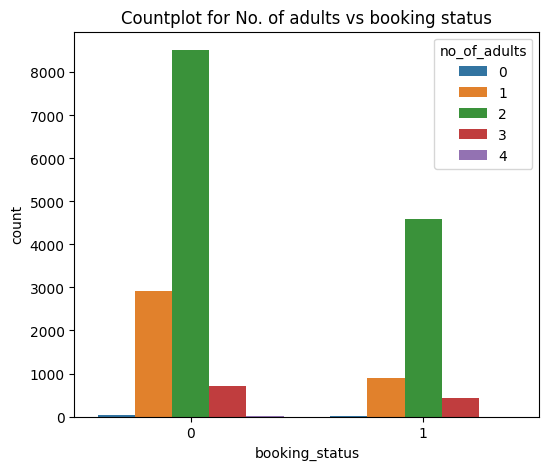

In [ ]:
countplot_of_2('booking_status', 'no_of_adults', 'Countplot for No. of adults vs booking status')

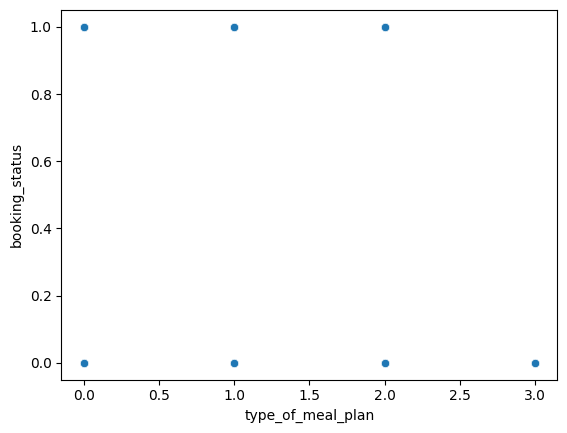

In [ ]:
sns.scatterplot(data = train, x = "type_of_meal_plan", y = "booking_status")
plt.show()

In [ ]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.025139,0.010956,0.163542,0.098254,0.077915,0.018254,0.028433,-0.098518,-0.198334,-0.043494,-0.119703,0.292910,0.179970,0.094354
no_of_children,-0.017565,1.000000,0.026761,0.018957,-0.066445,0.026409,0.484223,-0.051646,0.044164,0.008244,0.020804,0.078264,-0.037868,-0.015580,-0.021495,0.342425,0.128325,0.035093
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.048357,-0.029054,0.044741,0.047559,0.054914,-0.010060,0.024026,-0.011626,-0.058549,-0.015543,-0.018829,-0.005837,0.057814,0.061117
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.076067,-0.054087,0.066756,0.148348,0.037240,0.044170,-0.007471,-0.060650,-0.094936,-0.024761,-0.041108,0.029326,0.037413,0.096472
type_of_meal_plan,0.025139,-0.066445,-0.048357,-0.076067,1.000000,-0.021426,-0.146645,0.134350,-0.083469,0.019607,0.019243,-0.156242,-0.068313,-0.018854,-0.042258,0.039359,-0.054258,0.076685
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,-0.021426,1.000000,0.031255,-0.076608,0.006502,-0.018159,-0.008735,0.109336,0.116001,0.027336,0.062674,0.062199,0.083360,-0.092640
room_type_reserved,0.163542,0.484223,0.044741,0.066756,-0.146645,0.031255,1.000000,-0.088265,0.073680,0.003517,0.030617,0.165417,-0.006948,-0.001362,-0.001447,0.411577,0.121888,0.021723
lead_time,0.098254,-0.051646,0.047559,0.148348,0.134350,-0.076608,-0.088265,1.000000,0.148482,0.140062,0.012856,-0.312090,-0.135079,-0.042747,-0.078664,-0.069985,-0.103707,0.434314
arrival_year,0.077915,0.044164,0.054914,0.037240,-0.083469,0.006502,0.073680,0.148482,1.000000,-0.343696,0.008437,0.083831,-0.018765,0.006593,0.025689,0.184786,0.048557,0.183256
arrival_month,0.018254,0.008244,-0.010060,0.044170,0.019607,-0.018159,0.003517,0.140062,-0.343696,1.000000,-0.034861,-0.038777,-0.004458,-0.040632,-0.015225,0.053381,0.103389,-0.011472


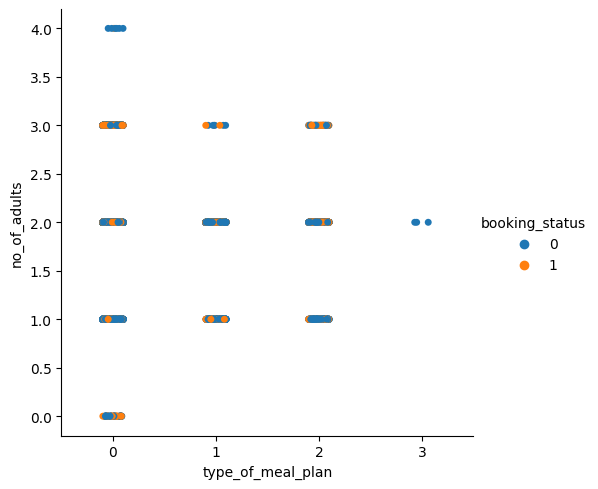

In [ ]:
sns.catplot(data = train, x = "type_of_meal_plan", y = "no_of_adults", hue='booking_status')
plt.show()

In [ ]:
X = train.drop('booking_status', axis = 1)
y = train['booking_status']

In [ ]:
train['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

In [ ]:
from imblearn import over_sampling
os = over_sampling. RandomOverSampler()
X, y = os.fit_resample(X,y)
y.value_counts()

0    12195
1    12195
Name: booking_status, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
def model_evaluation (classifier):
  cm = confusion_matrix(y_val, classifier.predict(X_val))
  counts = [value for value in cm.flatten()]
  labels = [f'{v1}' for v1 in counts]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
  y_pred = classifier.predict(X_val)
  yt_pred = classifier.predict(X_train)
  print('The Training Accuracy of the algorithm is', accuracy_score (y_train, yt_pred))
  print("The validation Accuracy of the algorithm is", accuracy_score (y_val, y_pred))
  return [ (accuracy_score (y_val * 100, y_pred * 100) * 100), (accuracy_score (y_val * 100, y_pred * 100) * 100), (f1_score (y_val,y_pred) ) ]

The Training Accuracy of the algorithm is 0.8694649446494465
The validation Accuracy of the algorithm is 0.7947929479294793


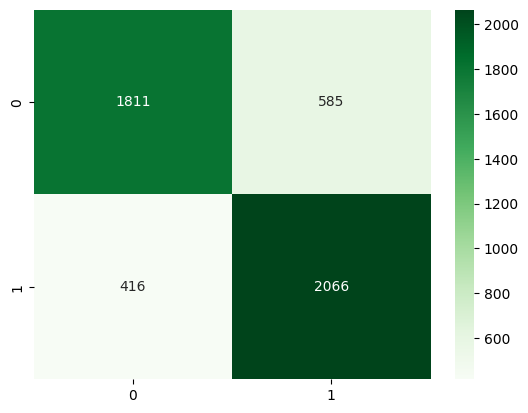

In [ ]:
knn_r = model_evaluation(knn)

The Training Accuracy of the algorithm is 0.694290692906929
The validation Accuracy of the algorithm is 0.6883968839688397


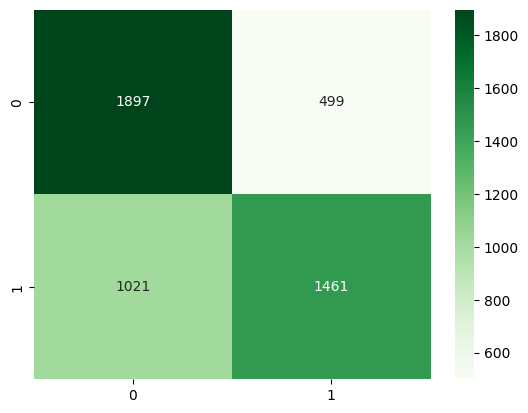

In [ ]:
svm_r = model_evaluation(svm)

The Training Accuracy of the algorithm is 0.5445366953669537
The validation Accuracy of the algorithm is 0.5604756047560475


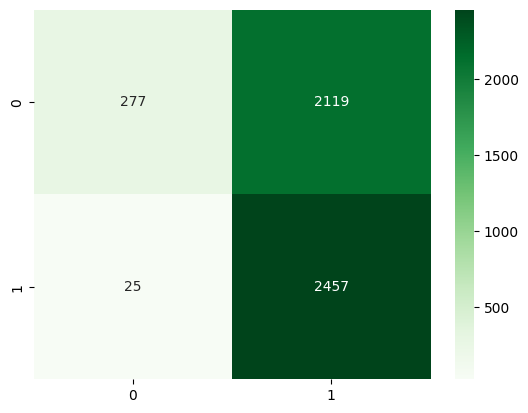

In [ ]:
gnb_r = model_evaluation(gnb)

The Training Accuracy of the algorithm is 0.7648113981139811
The validation Accuracy of the algorithm is 0.7624026240262403


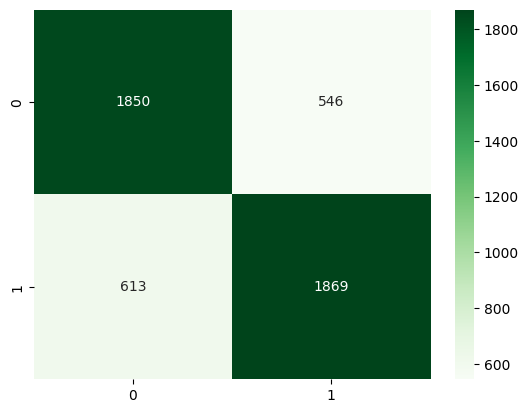

In [ ]:
lr_r = model_evaluation(lr)

The Training Accuracy of the algorithm is 0.995489954899549
The validation Accuracy of the algorithm is 0.9114391143911439


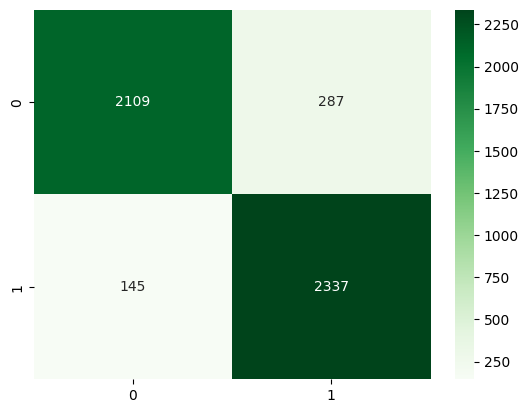

In [ ]:
dt_r = model_evaluation(dt)

The Training Accuracy of the algorithm is 0.995489954899549
The validation Accuracy of the algorithm is 0.9339893398933989


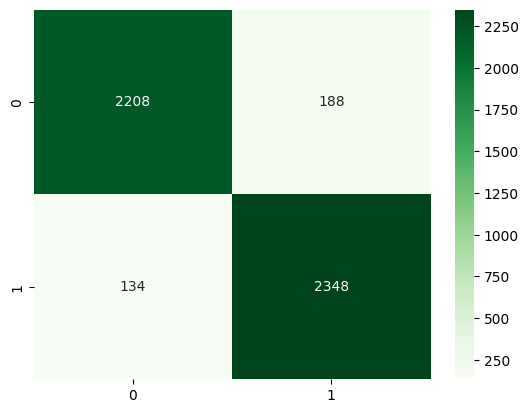

In [ ]:
rf_r = model_evaluation(rf)

The Training Accuracy of the algorithm is 0.835690856908569
The validation Accuracy of the algorithm is 0.8364083640836408


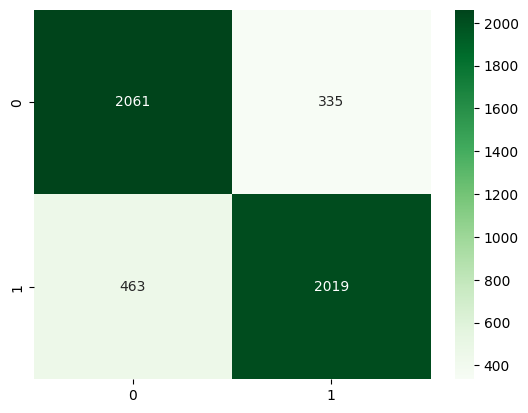

In [ ]:
gb_r = model_evaluation(gb)

In [ ]:
results = pd.DataFrame(data = [knn_r, svm_r, gnb_r, lr_r,dt_r, rf_r, gb_r],
columns = ['Training Accuracy', 'Validation Accuracy', 'F1 Score'],
                         index = ['K Nearest Neighbors', 'Support Vector Machines',
                                  'Naive Bayes', 'Logistic Regression',
                                  'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [ ]:
results

,Training Accuracy,Validation Accuracy,F1 Score
K Nearest Neighbors,0.867261,0.793973,0.802048
Support Vector Machines,0.697263,0.684092,0.649215
Naive Bayes,0.569086,0.570316,0.697460
Logistic Regression,0.766451,0.753588,0.750415
Decision Tree,0.995695,0.910414,0.913688
Random Forest,0.995695,0.931119,0.932638
Gradient Boost,0.838048,0.822673,0.818392


In [ ]:
fi = rf.feature_importances_

In [ ]:
col = train.columns

In [ ]:
feat_imp = {}
for i, j in zip(fi,col):
  feat_imp[j] = i

In [ ]:
feat_imp

{'no_of_adults': 0.023853935159905436,
 'no_of_children': 0.007585799695709715,
 'no_of_weekend_nights': 0.038155533171767037,
 'no_of_week_nights': 0.05139025430087256,
 'type_of_meal_plan': 0.02021957071369087,
 'required_car_parking_space': 0.008101303327618234,
 'room_type_reserved': 0.0163446205739642,
 'lead_time': 0.3099435408953617,
 'arrival_year': 0.02864703590832765,
 'arrival_month': 0.08630044241359279,
 'arrival_date': 0.08963493408948958,
 'market_segment_type': 0.05550790297519834,
 'repeated_guest': 0.0028184731008656376,
 'no_of_previous_cancellations': 0.00036729796804076326,
 'no_of_previous_bookings_not_canceled': 0.003032100762518287,
 'avg_price_per_room': 0.15193900482448217,
 'no_of_special_requests': 0.10615825011859505}

In [ ]:
rfc_results = []

In [ ]:
#original
def model_evaluation1(classifier):

  for main in [0.03,0.025,0.020,0.014, 0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(), feat_imp.values()):
      if j < main:
       to_drop.append(i)
  X_new = X.drop (to_drop, axis = 1)
  y_new = y
  X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.3)
  rfc_new = RandomForestClassifier()
  rfc_new.fit(X1_train, y1_train)
  temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
  rfc_results.append(temp1)

IndentationError: ignored

In [ ]:
#original
def model_evaluation(classifier):

  for main in [0.03,0.025,0.020,0.014, 0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(), feat_imp.values()):
      if j < main:
       to_drop.append(i)
  X_new = X.drop (to_drop, axis = 1)
  y_new = y
  X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.3)
  rfc_new = RandomForestClassifier()
  rfc_new.fit(X1_train, y1_train)
  temp1 = model_evaluation(X1_train.shape[1], rfc_new)
  rfc_results.append(temp1)

In [ ]:
for main in [0.03,0.025,0.020,0.014,0.008]:
  to_drop = []
  for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < main:
      to_drop.append(i)
  X_new = X.drop(to_drop,axis = 1)
  y_new = y
  X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
  rfc_new = RandomForestClassifier()
  rfc_new.fit(X1_train, y1_train)
  temp1 = model_evaluation1(rfc_new, X1_train, y1_train, X1_val, y1_val)
  rfc_results.append(temp1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Validtion Accuracy'])
randomf

,Number of features,Training Accuracy,Validtion Accuracy


In [ ]:
parameters = {
              "max_features": [None, 6,7,8],
              "max_depth": [None, 13, 15]
              }

In [ ]:
from sklearn.model_selection import KFold
gdcv = GridSearchCV(estimator=rf, param_grid=parameters)

In [ ]:
gdcv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 13, 15],
                         'max_features': [None, 6, 7, 8]})

In [ ]:
gdcv.best_params_

{'max_depth': None, 'max_features': 7}

In [ ]:
rf_new = RandomForestClassifier (max_depth=15, max_features = 6)
rf_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=6)

The Training Accuracy of the algorithm is 0.9478269782697827
The validation Accuracy of the algorithm is 0.9110291102911029


[91.10291102911029, 91.10291102911029, 0.9124647035094796]

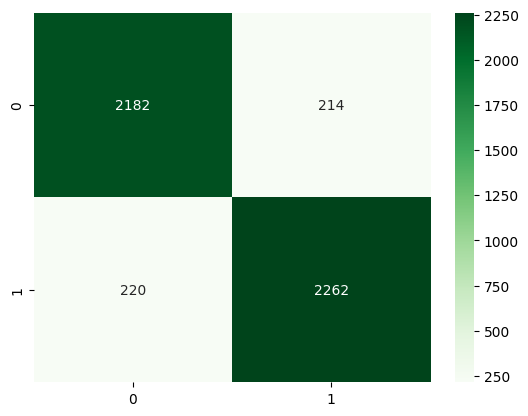

In [ ]:
model_evaluation(rf_new)

In [ ]:
pred = rf_new.predict(X_val)

In [ ]:
pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
pd.DataFrame({'Original': y_val, 'Predicted': pred})

,Original,Predicted
3567,0,0
18835,1,1
5279,1,1
9688,0,0
12298,1,0
...,...,...
2820,0,0
22567,1,1
24236,1,1
10885,0,0


In [ ]:
pickle.dump (rf_new, open('model.pkl', 'wb'))

In [ ]:
# Check feature names in training data
print("Training Feature Names:", X_train.columns.tolist())




Training Feature Names: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:


# Check feature names in validation data
print("Validation Feature Names:", X_val.columns.tolist())


Validation Feature Names: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
import pandas as pd

if not X_train.columns.equals(X_val.columns):
    print("Column mismatch between X_train and X_val")
